# Predicting Job Titles from Resumes

### Importing Packages

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import gc
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')

### Reading the Data

In [2]:
data = pd.read_csv(r"C:\Users\Anisha Ray\Downloads\archive (6)\jobss.csv")

data.head()

,Job Title,Unnamed: 1,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role,Longitude,Latitude,sal
0,Digital Media Planner,NaN,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager,72.877393,19.075990,3855
1,Online Bidding Executive,NaN,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer,73.854454,18.521428,2639
2,Trainee Research/ Research Executive- Hi- Tec...,NaN,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive,77.002700,28.428262,2156
3,Technical Support,NaN,0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer,72.877393,19.075990,4059
4,Software Test Engineer -hyderabad,NaN,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer,78.474061,17.360589,5347


In [3]:
data.drop("Unnamed: 1", axis=1, inplace=True)
data.head()

,Job Title,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role,Longitude,Latitude,sal
0,Digital Media Planner,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager,72.877393,19.075990,3855
1,Online Bidding Executive,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer,73.854454,18.521428,2639
2,Trainee Research/ Research Executive- Hi- Tec...,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive,77.002700,28.428262,2156
3,Technical Support,0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer,72.877393,19.075990,4059
4,Software Test Engineer -hyderabad,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer,78.474061,17.360589,5347


In [5]:
data.loc[:, 'Longitude':].describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')\
                            .background_gradient(subset=['min'], cmap='summer')

,count,mean,std,min,25%,50%,75%,max
Longitude,473.000000,75.988498,14.397788,-79.030572,73.854454,77.121215,77.590082,121.097753
Latitude,473.000000,21.089736,7.080071,-8.123729,17.360589,19.075990,28.428262,46.314475
sal,500.000000,4224.594000,1598.716696,1510.000000,2864.250000,4213.000000,5623.000000,6991.000000


### Shape of Data

In [6]:
data.shape

(500, 11)

### Data Preprocessing

In [7]:
data.isnull().sum()

Job Title                  11
Job Experience Required     0
Key Skills                  0
Role Category              37
Location                   11
Functional Area            11
Industry                   11
Role                       14
Longitude                  27
Latitude                   27
sal                         0
dtype: int64

In [8]:
data[data["Location"].isnull().values==True]

,Job Title,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role,Longitude,Latitude,sal
59,NaN,vide,Marketing|Executive|Marketing|Marketing|Execut...,NaN,NaN,NaN,NaN,NaN,11.048029,46.314475,2709
62,NaN,vide,Manager|Transformation|Manager|Transformation|...,NaN,NaN,NaN,NaN,NaN,11.048029,46.314475,3764
116,NaN,vide,vide,NaN,NaN,NaN,NaN,NaN,11.048029,46.314475,6431
168,NaN,vide,vide,NaN,NaN,NaN,NaN,NaN,11.048029,46.314475,6449
172,NaN,vide,Sales|Counter|Sales|Sales|Sales|Sales|Counter|...,NaN,NaN,NaN,NaN,NaN,11.048029,46.314475,4015
186,NaN,vide,vide,NaN,NaN,NaN,NaN,NaN,11.048029,46.314475,4662
212,NaN,vide,vide,NaN,NaN,NaN,NaN,NaN,11.048029,46.314475,1660
277,NaN,vide,networking|Network|Lead|Network|Lead|Network|N...,NaN,NaN,NaN,NaN,NaN,11.048029,46.314475,4450
441,NaN,vide,Java|Trainer|Java|trainer|Trainer|java|Trainer...,NaN,NaN,NaN,NaN,NaN,11.048029,46.314475,6310
467,NaN,vide,vide,NaN,NaN,NaN,NaN,NaN,11.048029,46.314475,5477


In [9]:
data.dropna(axis=0, subset=["Location"], inplace=True)
data.isnull().sum()

Job Title                   0
Job Experience Required     0
Key Skills                  0
Role Category              26
Location                    0
Functional Area             0
Industry                    0
Role                        3
Longitude                  27
Latitude                   27
sal                         0
dtype: int64

### Exploratory Data Analysis

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Job Title                489 non-null    object 
 1   Job Experience Required  489 non-null    object 
 2   Key Skills               489 non-null    object 
 3   Role Category            463 non-null    object 
 4   Location                 489 non-null    object 
 5   Functional Area          489 non-null    object 
 6   Industry                 489 non-null    object 
 7   Role                     486 non-null    object 
 8   Longitude                462 non-null    float64
 9   Latitude                 462 non-null    float64
 10  sal                      489 non-null    int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 45.8+ KB


### Location Counts

In [11]:
locat_sort = pd.DataFrame()
locat_sort["Location"] = data["Location"]
locat_sort["Counts"] = locat_sort["Location"].map(locat_sort["Location"].value_counts())
locat_sort.sort_values("Counts", inplace=True)

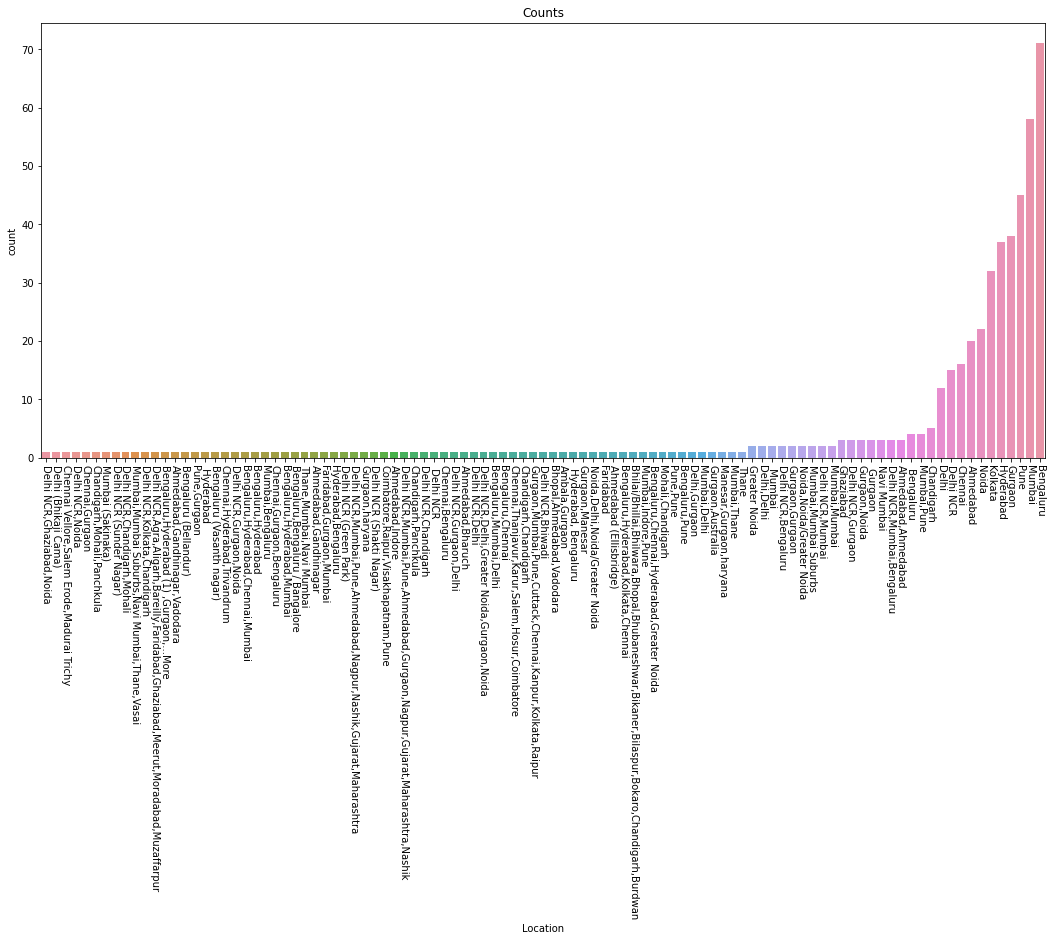

In [12]:
f,ax=plt.subplots(figsize=(18,8))
sns.countplot('Location',data=locat_sort,ax=ax)
ax.set_title('Counts')
ax.set_xticklabels(ax.get_xticklabels(), rotation=-90)
plt.show()

In [14]:
from mpl_toolkits.basemap import Basemap

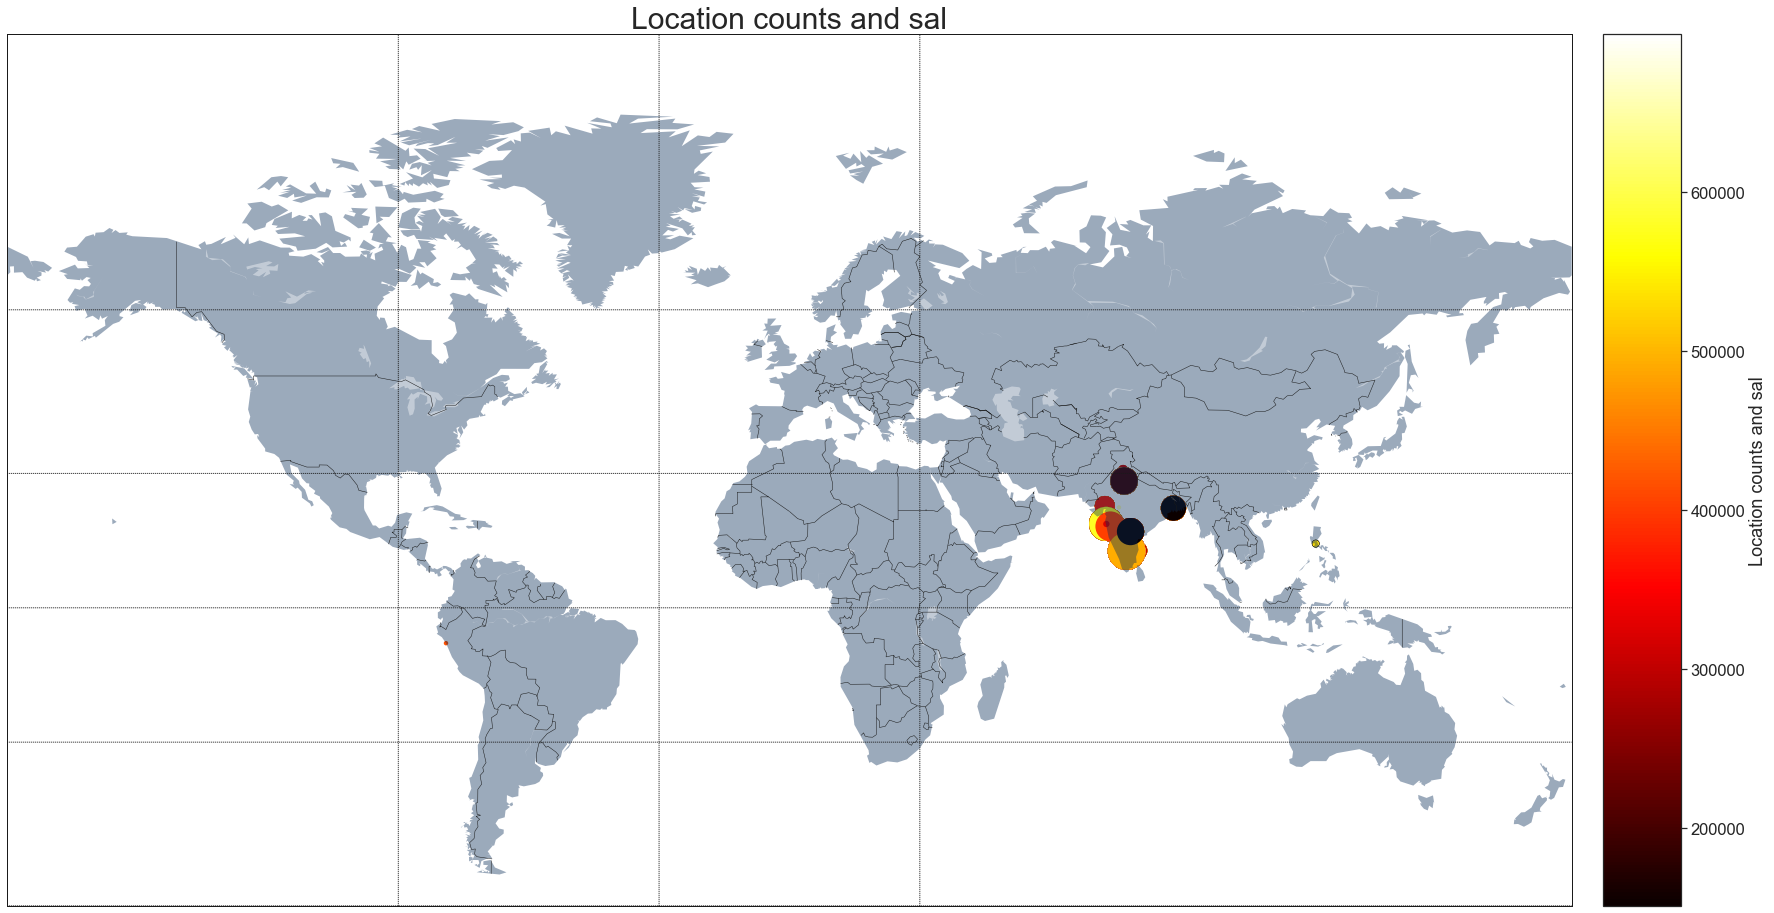

In [16]:
def mapWorld():
    m = Basemap(projection='mill',llcrnrlat=-60,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
    #m.drawcoastlines()
    m.drawcountries()
    m.drawparallels(np.arange(-90,91.,30.))
    m.drawmeridians(np.arange(-90,90.,60.))
    
    m.drawmapboundary(fill_color='#FFFFFF')
    lat = data['Latitude'].values
    lon = data['Longitude'].values
    a_1 = data['sal'].values
    a_2 = data['Counts'].values
    m.scatter(lon, lat, latlon=True,c=100*a_1,s=20*a_2,linewidth=0,edgecolors='black',cmap='hot', alpha=1)
    m.fillcontinents(color='#072B57',lake_color='#FFFFFF',alpha=0.4)
    cbar = m.colorbar()
    cbar.set_label('Location counts and sal')
    #plt.clim(20000, 100000)
    plt.title("Location counts and sal", fontsize=30)
    plt.show()
    
sns.set(style="white",font_scale=1.5)
plt.figure(figsize=(30,30))

data["Counts"] = data["Location"].map(data["Location"].value_counts())
mapWorld()

<AxesSubplot:title={'center':'Log Normal'}, xlabel='sal'>

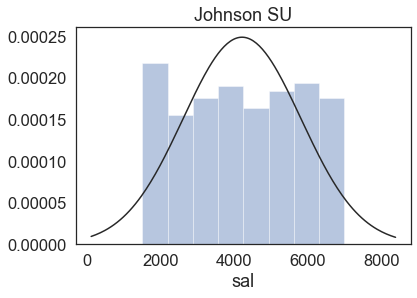

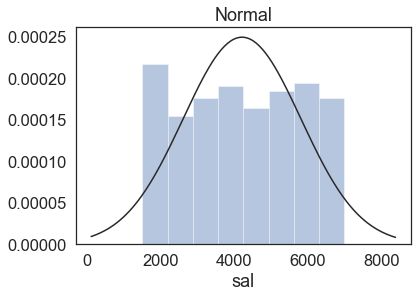

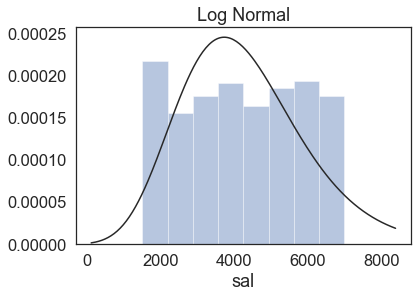

In [17]:
import scipy.stats as st
y = data['sal']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

In [18]:
data.head()

,Job Title,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role,Longitude,Latitude,sal,Counts
0,Digital Media Planner,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager,72.877393,19.075990,3855,58
1,Online Bidding Executive,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer,73.854454,18.521428,2639,1
2,Trainee Research/ Research Executive- Hi- Tec...,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive,77.002700,28.428262,2156,38
3,Technical Support,0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer,72.877393,19.075990,4059,58
4,Software Test Engineer -hyderabad,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer,78.474061,17.360589,5347,37


In [19]:
del data["Counts"]
data["Job Title"].value_counts()

 Business Development Manager                                  4
 Java Developer                                                3
 PHP Developer                                                 3
 Key Accounts Manager                                          2
 Sales Executive                                               2
                                                              ..
Java Enterprise Edition                                        1
 Inbound Phone Banking Voice Process - Leading Bank - Noida    1
 Software Development / Software Engineer                      1
 Technical / Functional Skills                                 1
 Tech caller hiring a huge number of Executives.               1
Name: Job Title, Length: 471, dtype: int64

In [20]:
feat = ["Job Title", "Job Experience Required", "Key Skills", "Role Category", "Location", "Functional Area","Industry","Role"]

for col in tqdm(feat):
    map_dict = dict(zip(data[col].unique(), range(data[col].nunique())))
    
    data[col] = data[col].map(map_dict)

    data[f'{col}_count'] = data[col].map(data[col].value_counts())

data.head()

  0%|          | 0/8 [00:00<?, ?it/s]

,Job Title,Job Experience Required,Key Skills,Role Category,Location,Functional Area,Industry,Role,Longitude,Latitude,sal,Job Title_count,Job Experience Required_count,Key Skills_count,Role Category_count,Location_count,Functional Area_count,Industry_count,Role_count
0,0,0,0,0.0,0,0,0,0.0,72.877393,19.075990,3855,1,26,1,3.0,58,13,10,1.0
1,1,1,1,1.0,1,1,1,1.0,73.854454,18.521428,2639,1,32,1,35.0,1,74,187,16.0
2,2,2,2,2.0,2,2,2,2.0,77.002700,28.428262,2156,1,16,1,3.0,38,10,42,1.0
3,3,3,3,3.0,0,3,1,3.0,72.877393,19.075990,4059,1,7,1,15.0,58,119,187,6.0
4,4,1,4,4.0,3,4,1,4.0,78.474061,17.360589,5347,1,32,1,130.0,37,7,187,7.0


<AxesSubplot:xlabel='Longitude', ylabel='Density'>

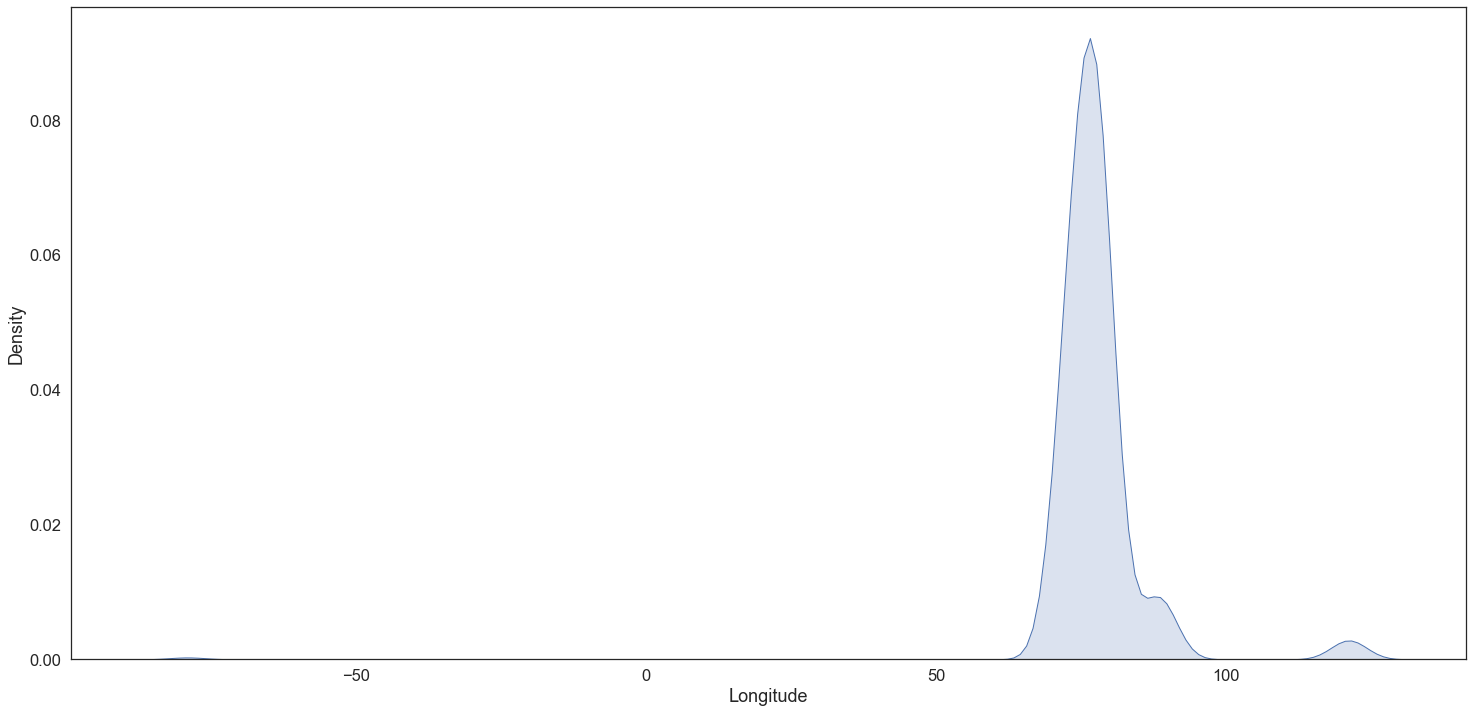

In [21]:
f,ax=plt.subplots(figsize=(25,12))
sns.kdeplot(data["Longitude"],shade=True,alpha=0.2,legend=True,label='Longitude distribution density')

<AxesSubplot:xlabel='Latitude', ylabel='Density'>

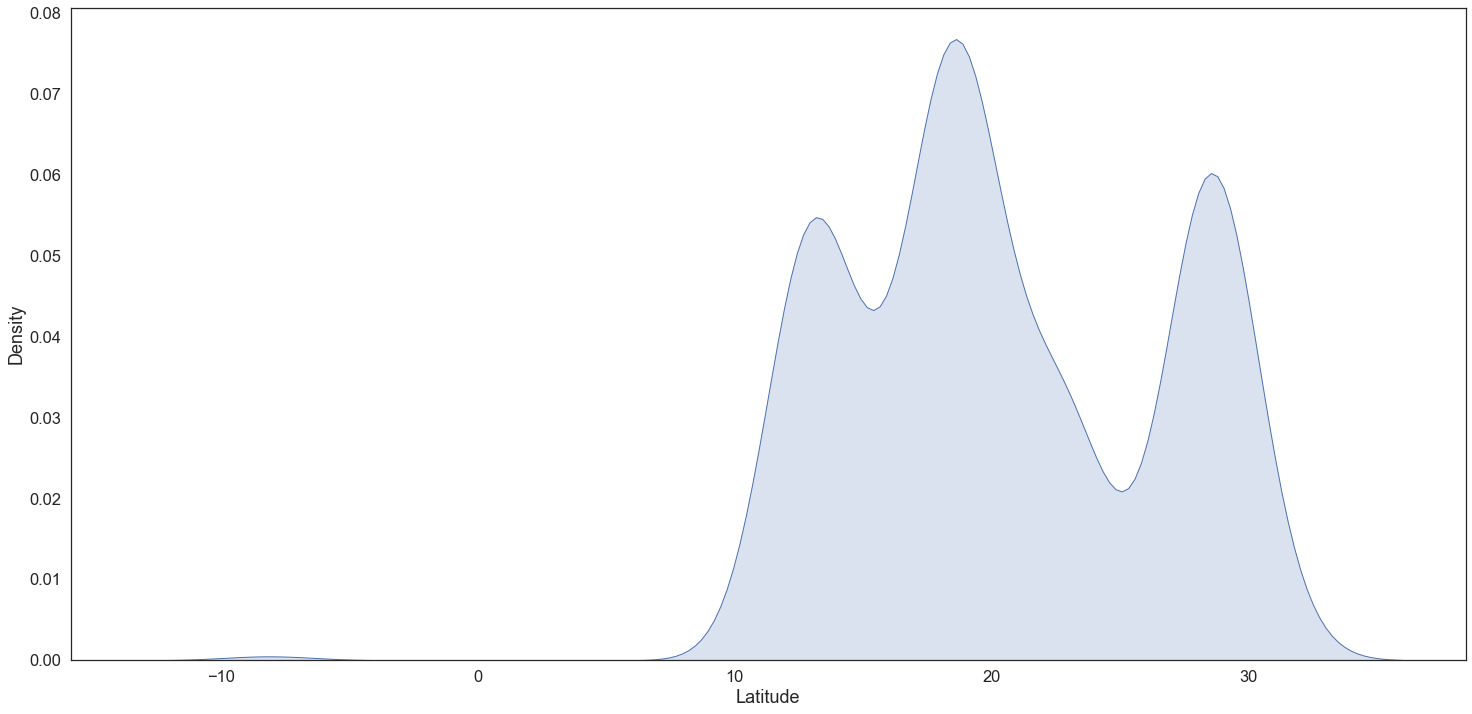

In [22]:
f,ax=plt.subplots(figsize=(25,12))
sns.kdeplot(data["Latitude"],shade=True,alpha=0.2,legend=True,label='Latitude distribution density')

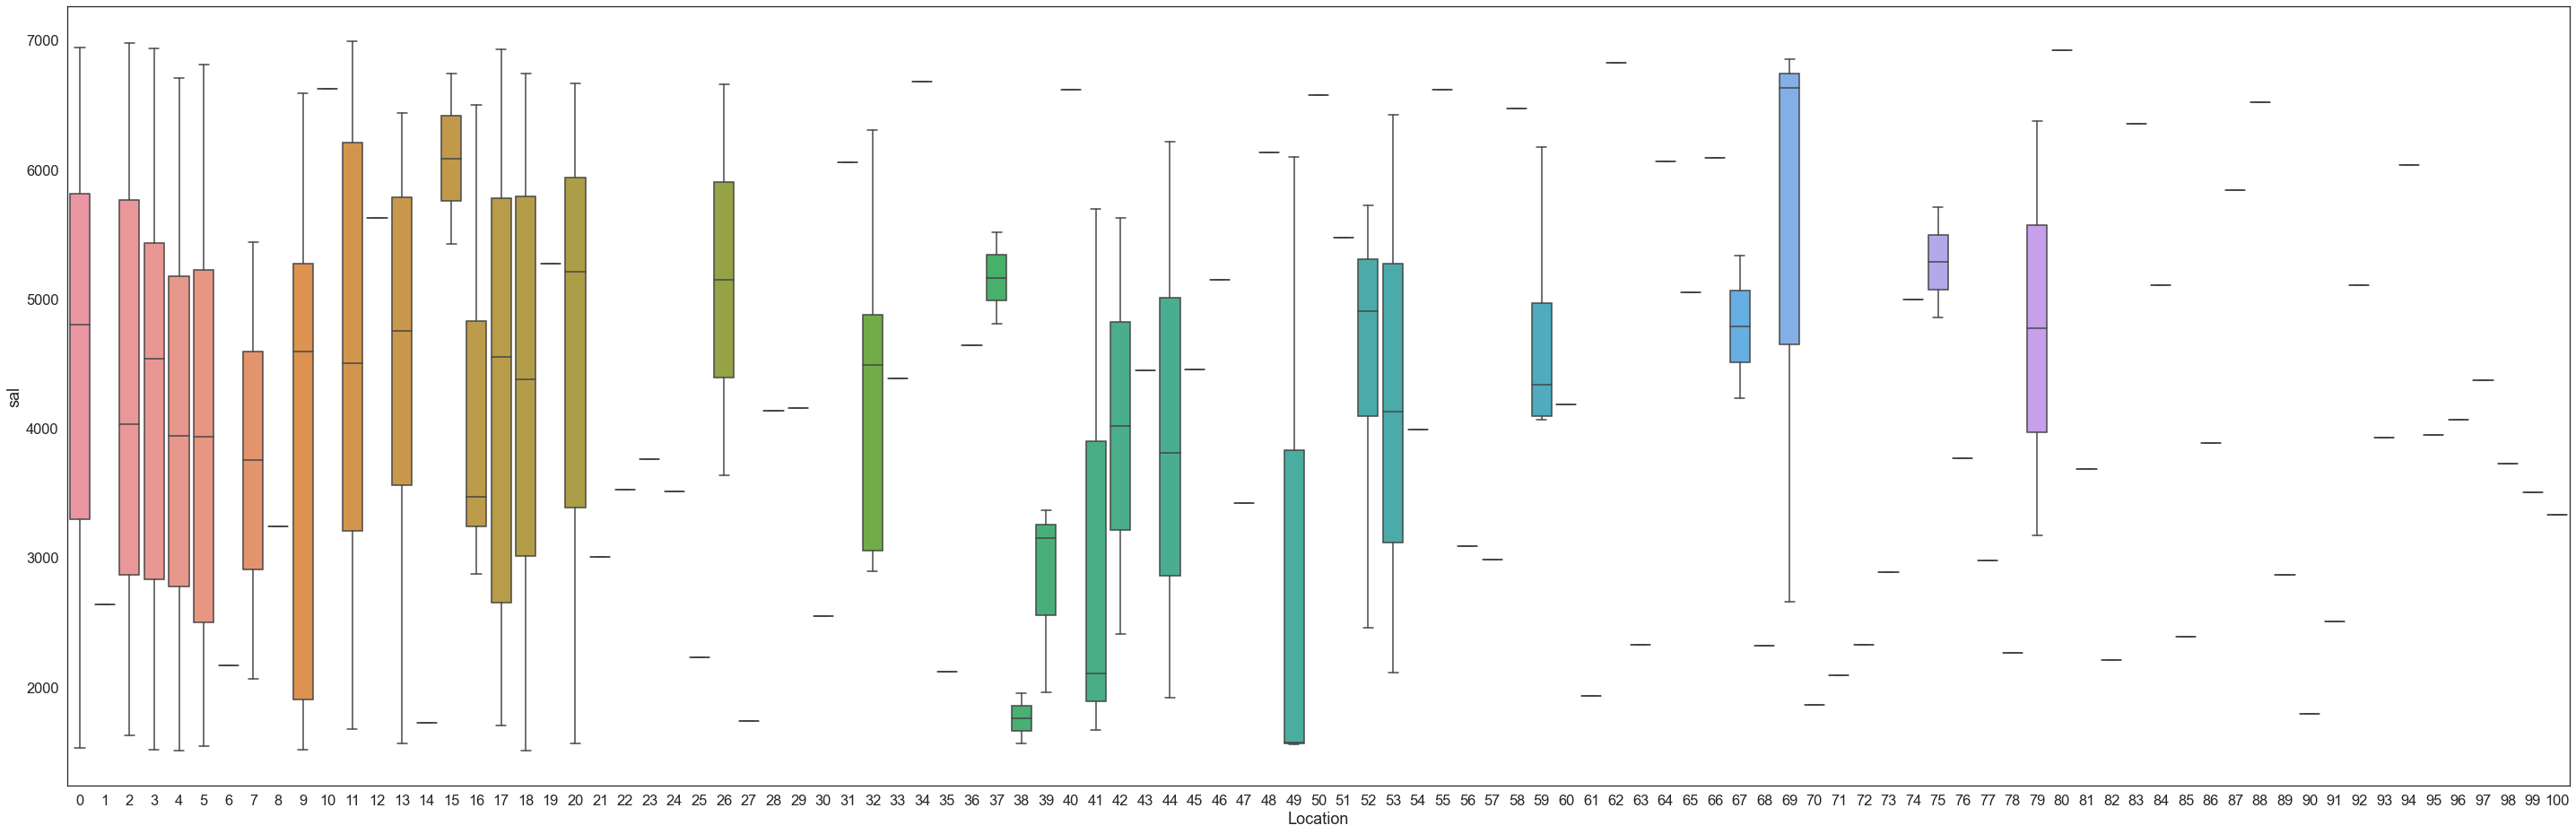

In [23]:
f,ax=plt.subplots(figsize=(50,16))
df = pd.concat([data['sal'], data['Location']], axis=1)
fig = sns.boxplot(x='Location', y="sal", data=df)

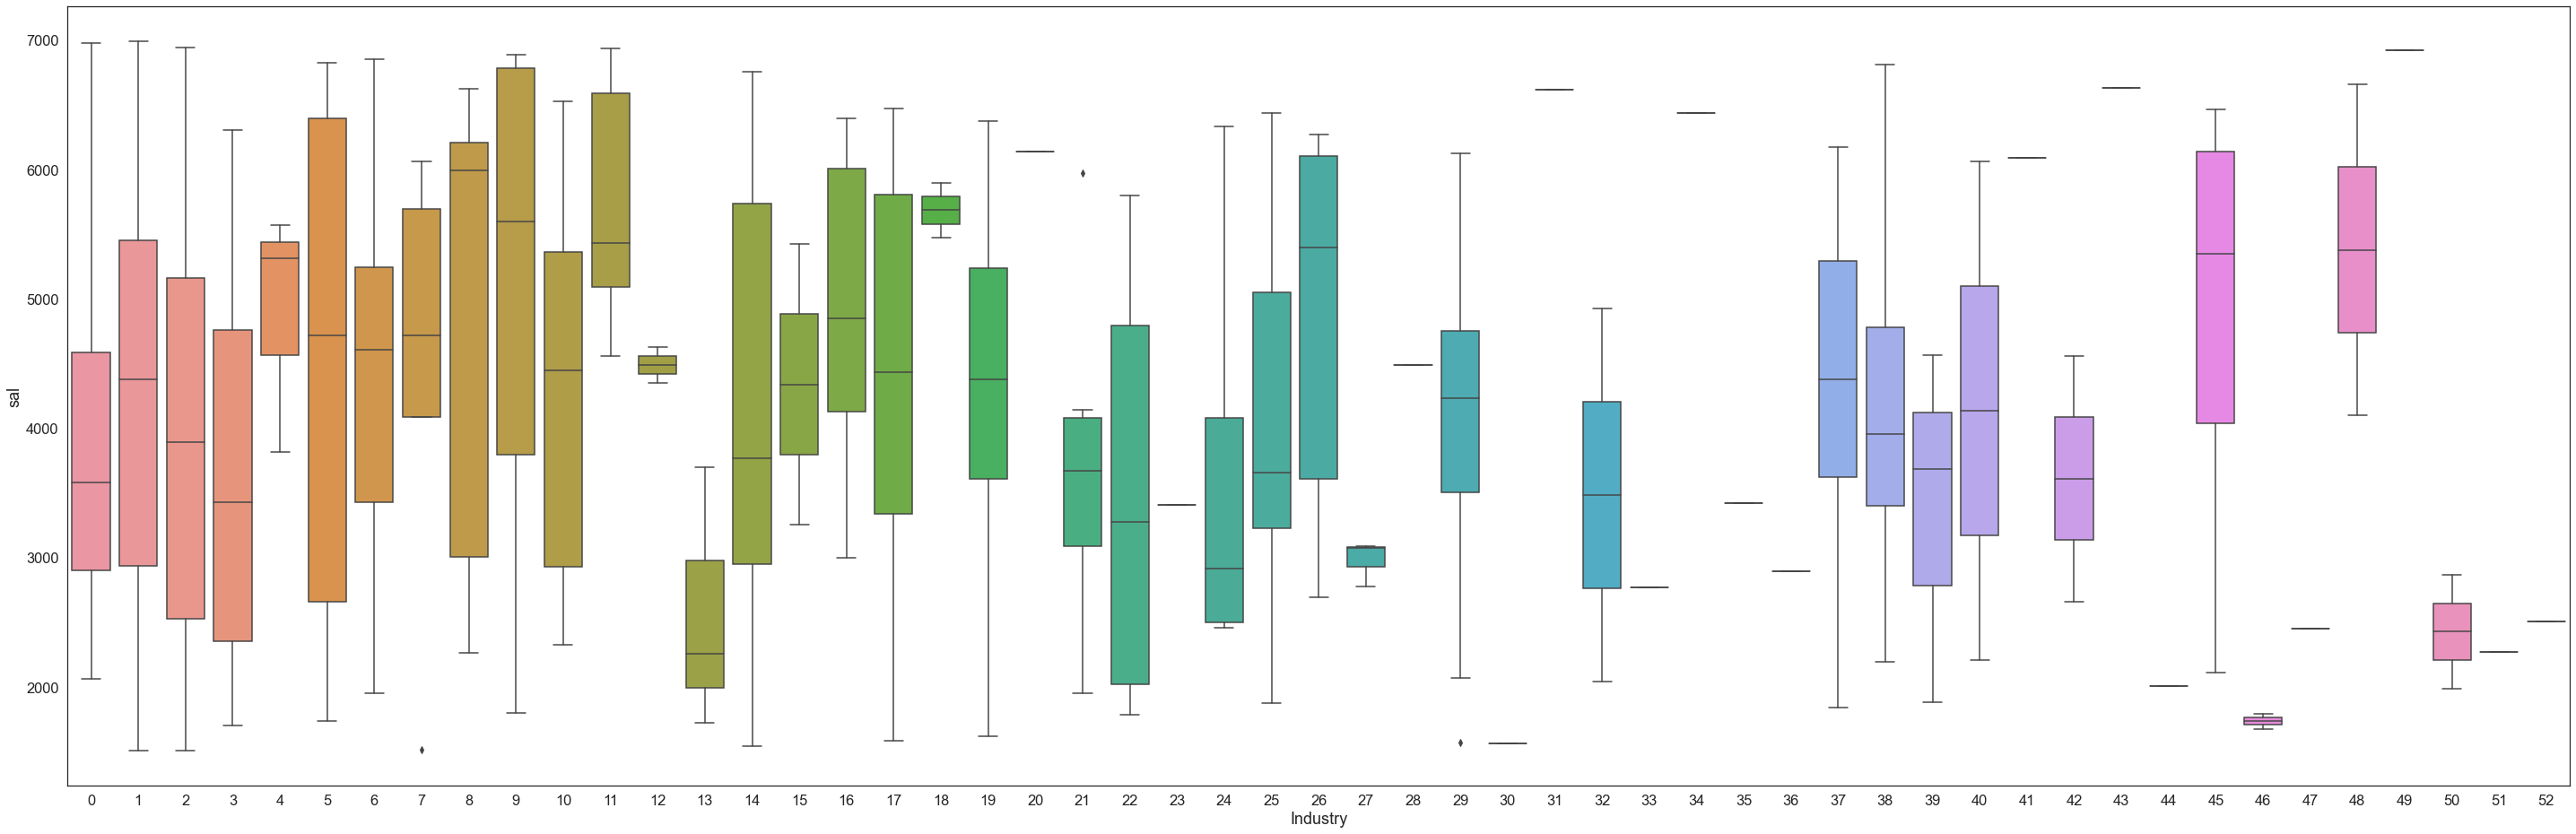

In [24]:
f,ax=plt.subplots(figsize=(50,16))
df = pd.concat([data['sal'], data['Industry']], axis=1)
fig = sns.boxplot(x='Industry', y="sal", data=df)

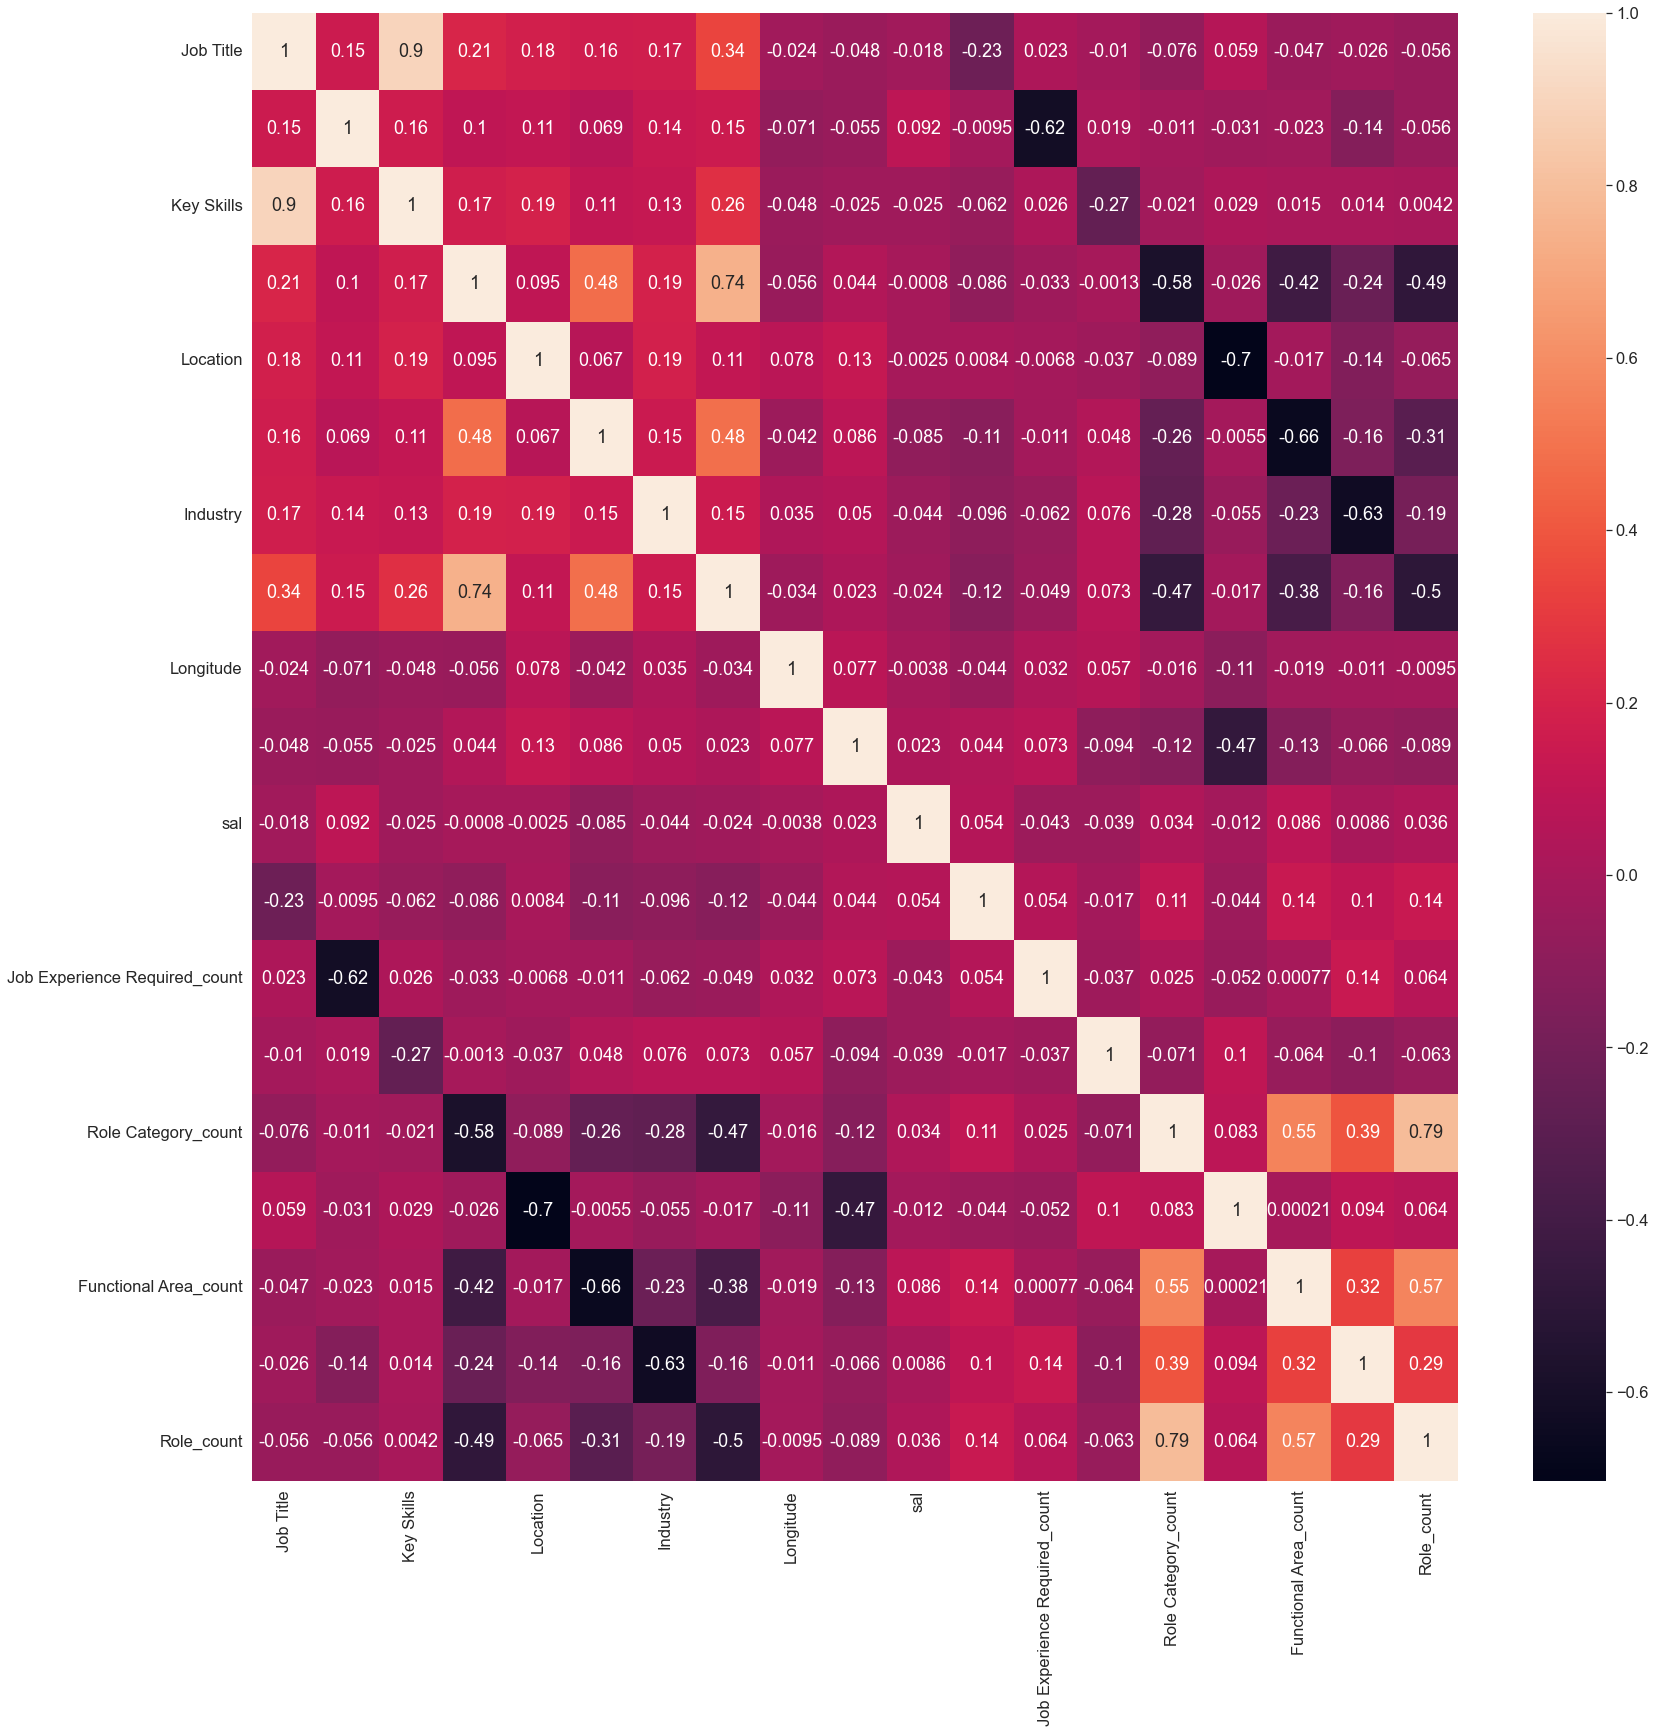

In [25]:
sns.heatmap(data.corr(),annot=True)
fig=plt.gcf()
fig.set_size_inches(27,27)
plt.show()

### Model

In [33]:
pip install lightgbm

In [34]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, train_test_split, KFold
from sklearn.metrics import roc_auc_score, mean_squared_error, confusion_matrix, mean_absolute_error
from bayes_opt import BayesianOptimization
import scikitplot as skplt
import lightgbm as lgb

In [35]:
y = data["sal"]
del data["sal"]
gc.collect()

X_train, X_val, y_train, y_val = train_test_split(data, y, test_size = 0.2, random_state=42)

In [36]:
def evaluateRegressor(true,predicted,message = "Test set"):
    MSE = mean_squared_error(true,predicted,squared = True)
    MAE = mean_absolute_error(true,predicted)
    RMSE = mean_squared_error(true,predicted,squared = False)
    LogRMSE = mean_squared_error(np.log(true),np.log(predicted),squared = False)
    print(message)
    print("MSE:", MSE)
    print("MAE:", MAE)
    print("RMSE:", RMSE)
    print("LogRMSE:", LogRMSE)

In [37]:
def PlotPrediction(true,predicted, title = "Dataset: "):
    fig = plt.figure(figsize=(20,20))
    ax1 = fig.add_subplot(111)
    ax1.set_title(title + 'True vs Predicted')
    ax1.scatter(list(range(0,len(true))),true, s=10, c='r', marker="o", label='True')
    ax1.scatter(list(range(0,len(predicted))), predicted, s=10, c='b', marker="o", label='Predicted')
    plt.legend(loc='upper right');
    plt.show()

In [38]:
LGBMReg = lgb.LGBMRegressor().fit(X_train, y_train)
pred = LGBMReg.predict(X_val)

Train Set:
MSE: 3082099.6100664814
MAE: 1457.2548325617465
RMSE: 1755.5909575030516
LogRMSE: 0.47561675678419474


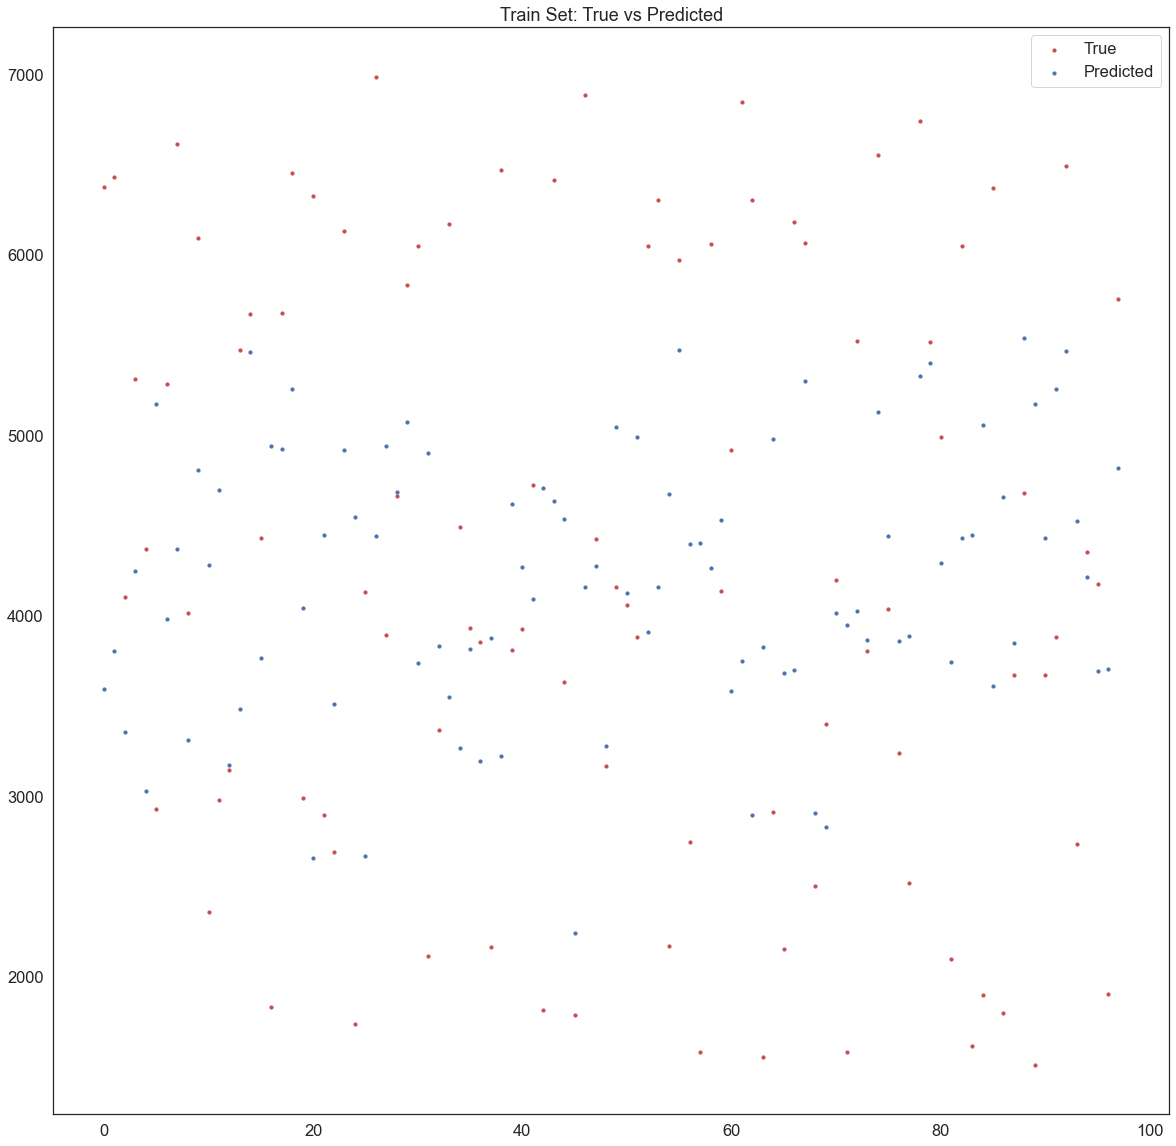

In [39]:
evaluateRegressor(y_val,pred, "Train Set:")
PlotPrediction(y_val,pred, "Train Set: ")

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

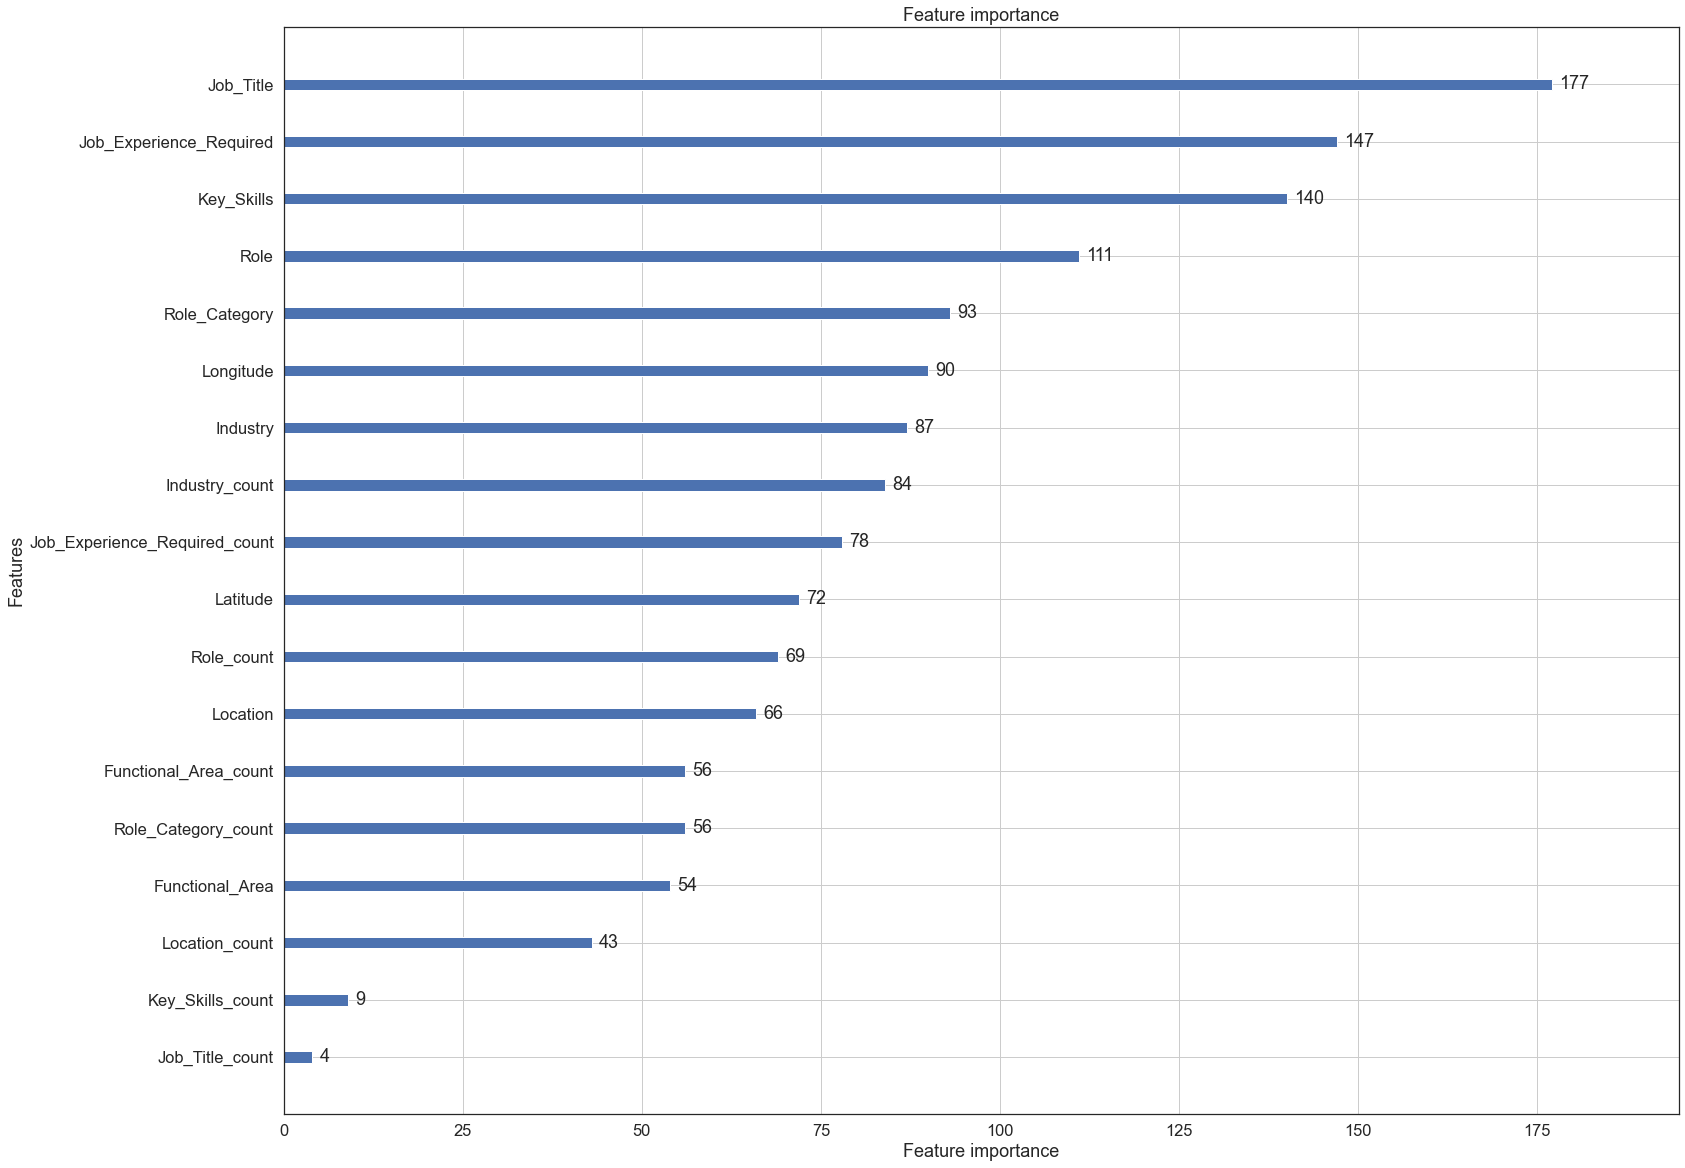

In [40]:
lgb.plot_importance(LGBMReg,figsize=(25,20))